A Estatística pode ser definida de forma simplificada e resumida, como: uma subárea da Matemática que busca estudar, descrever, interpretar e organizar a informação, através da coleta, descrição e análise de dados.

Assim, obviamente, a Estatística é considerada um dos pilares fundamentais em Data Science, juntamente com a parte de Tecnologia e Negócios.

Neste post, vamos ver e aplicar através da linguagem Python alguns dos conceitos mais básicos da Estatística Descritiva, uma das subdivisões da Estatística, responsável principalmente pelo resumo e descrição da informação.

Para isso, vamos utilizar alguns dos principais pacotes open-source e gratuitos voltados à análise de dados que compõem a **Toolbox de um Data Scientist**. São eles: Pandas e Matplotlib.

Também utilizaremos para aplicar os conceitos o Dataset da famosa [Competição do Titanic](https://www.kaggle.com/c/titanic) no Kaggle (Titanic: Machine Learning from Disaster).

Para auxiliar na estrutura do post, vou estar me baseando no excelente livro Estatística Básica, do professor adjunto da Escola de Administração de Empresas da FGV, Wilton Bussab, e do professor titular do Instituto de Matemática e Estatística da Universidade de São Paulo (IME), Pedro Morettin. Todas as demais referências, links e materiais estarão ao final do post.

Então chega de conversa. Vamos lá!

## Preparação dos Pacotes e Dataset

Antes de começarmos qualquer coisa, precisamos importar os pacotes que utilizaremos, que serão:

- Pandas. Pandas é um poderoso pacote de análise de dados com linguagem Python, ele permite, por exemplo, que trabalhemos facilmente com Dataframes, consigamos informações estatísticas das nossas variáveis e até mesmo plotar gráficos.

- Matplotlib. O Matplotlib é uma das principais bibliotecas para plotar gráficos em Python, com ele é possível, por exemplo, plotar gráficos de linha, barra, setor, histogramas e até graficos em 3D.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# O comando abaixo é um comando específico do Jupyter Notebook, ele é utilizado para que o Matplotlib não abra uma nova página para plotar os gráficos e plote no output da célula.
%matplotlib inline

Agora que já importamos os pacotes, vamos usar a função `pd.read_csv()` do Pandas para importar o Dataset da Competição do Titanic e salvá-lo na variável `df`. Apenas o arquivo "train.csv" de teste já é suficiente para o que precisamos.

Após isso, vamos utilizar o método `.head()` para visualizar os cinco primeiros registros do nosso Dataframe.

In [125]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Resumo de Dados

- **Distribuição de Frequências**

Bom, quando falamos de Estatística Descritiva, estamos buscando compreender melhor o comportamento das variáveis com que estamos trabalhando. Um dos conceitos mais básicos empregado nesta tarefa é a noção de ***Distribuição de Frequências,*** que procura resumir o comportamento de uma variável pela contabilização da frequência dos registros contidos nela.

Vamos obter a *distribuição de frequências* da variável Sex, que se refere ao sexo da tripulação do Titanic.

Para obtermos a *distribuição de frequências* de uma variável com Pandas, podemos simplesmente utilizar o método `.value_counts()`, que irá retornar a frequência que cada registro único possui naquela variável. Também utilizaremos a função `pd.DataFrame()` para termos uma melhor visualização dos resultados através de tabelas.

In [126]:
pd.DataFrame(df['Sex'].value_counts())

,Sex
male,577
female,314


Utilizando apenas o método `.value_counts()` sem nenhum parâmetro, conseguimos obter a frequência de cada registro da variável, ou seja, a *distribuição de frequências absoluta*. Se quisermos saber qual a *distribuição de frequências relativa*, isto é, quanto cada registro representa no total de registros da variável, podemos passar o parâmetro `.value_counts(normalize=True)`

In [127]:
pd.DataFrame(df['Sex'].value_counts(normalize=True))

,Sex
male,0.647587
female,0.352413


Como podemos ver, a *distribuição de frequências relativa* nos mostra que dentro da variável Sex, temos aproximadamente 65% de pessoas do sexo masculino e aproximadamente 35% do sexo feminino.

Uma outra forma de olhar para a distribuição de frequências de uma variável, é através da *distribuição de frequências acumulada*. A *distribuição de frequências acumulada* indica quantos elementos ou que percentual deles estão abaixo de determiado valor. Para isso, podemos aplicar o método `.cumsum()` do Pandas juntamente com o `.value_counts()`, para que ele retorne uma série cumulativa das frequências.

Por exemplo, vamos obter a *distribuição de frequências acumulada* da variável Pclass, que se refere a classe socioeconômica da tripulação. Comparativamente, a *distribuição de frequências absoluta* e *distribuição de frequências acumulada* ficariam:

In [146]:
# Distribuição de Frequências Absoluta
dist_freq_abs = df['Pclass'].value_counts(sort=False)
dist_freq_acu = df['Pclass'].value_counts(sort=False).cumsum()
pd.DataFrame({'Distribuição de Frequências Absoluta - Pclass': dist_freq_abs, 'Distribuição de Frequências Acumulada - Pclass': dist_freq_acu} )

,Distribuição de Frequências Absoluta - Pclass,Distribuição de Frequências Acumulada - Pclass
1,216,216
2,184,400
3,491,891


Excelente! Como podemos ver acima, temos a comparação de como funciona uma *distribuição de frequências absoluta* e uma *distribuição de frequências acumulada*.

Para obtermos a *distribuição de frequências acumulada relativa*, como já fizemos, basta adicionar o parâmetro `normalize=True`no método `.value_counts(normalize=True)`

In [6]:
pd.DataFrame(df['Pclass'].value_counts(normalize=True, sort=False).cumsum())

,Pclass
1,0.242424
2,0.448934
3,1.000000


- **Gráficos para Variáveis Qualitativas: Gráficos de Barras e de Setores(Pizza)**

Há muitos tipos de gráficos e muitas formas diferentes de visualizar dados. Contudo, temos alguns que são mais comuns e mais utilizados.

Quando estamos analisando uma variável qualitativa, os *Gráficos de Barras* e de *Composição de Setores* são alguns destes mais conhecidos. Em nosso dataset, temos algumas variáveis qualitativas que podemos visualizar através destes gráficos, como por exemplo a variável Sex(que se refere ao Sexo da tripulação) e a Embarked(que se refere ao portão de embarque).

Vamos visualizar a distribuição de frequências da variável Sex novamente.

In [7]:
pd.DataFrame(df['Sex'].value_counts())

,Sex
male,577
female,314


Se quisessemos visualizar essa distribuição em um gráfico de barras, podemos utilizar os gráficos do pacote Matplotlib pra fazer isso.

O Matplotlib possui uma variedade imensa de gráficos que podem ser usados. No caso do gráfico de barras, podemos plotá-lo através da função `plt.bar()`, onde precisamos passar pelo menos dois parâmetros com os eixos X e Y consecutivamente.

Vamos criar duas variáveis, uma chamada **sexo** e outra **frequencia**. A variável sexo irá conter o index do dataframe de distribuição de frequências que fizemos acima, o index do dataframe, neste caso, se refere aos próprios valores da variável. Enquanto que os valores do dataframe são as frequências de cada valor e serão armazenados na variável frequencia.

Assim, podemos adicionar os métodos `.index` e `.values` à distribuição de frequência da variável Sex obtida com `df['Sex'].value_counts()` para recebermos dois arrays com os valores e a quantidade de vezes que eles aparecem na variável.

In [152]:
sexo = df['Sex'].value_counts().index
frequencia = df['Sex'].value_counts().values
sexo, frequencia

(Index(['male', 'female'], dtype='object'), array([577, 314], dtype=int64))

Pronto! Agora podemos utilizar a função `plt.bar()` do Matplotlib e adicionar os parâmetros dos eixos X e Y com as variáveis sexo e frequencia. Vamos utilizar também a função `plt.show()` para visualizamos a figura do gráfico no modo display.

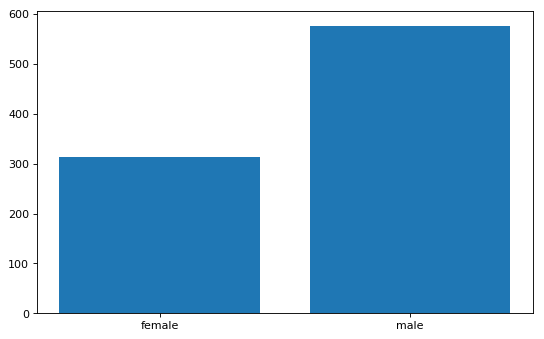

In [43]:
plt.figure(1, figsize=(8, 5), dpi=80)
plt.bar(sexo, frequencia)
plt.show()

Ótimo! Nós também podemos customizar os gráficos, e como boa prática, é bom que adicionemos pelo menos um título e o nome dos eixos. Para isso, vamos utilizar as funções `plt.title()` para o título, `plt.xlabel()` para o eixo X e `plt.ylabel()` para o eixo Y. É bem simples, basta passarmos uma string dentro a função para plotarmos um novo gráfico com estas informações.

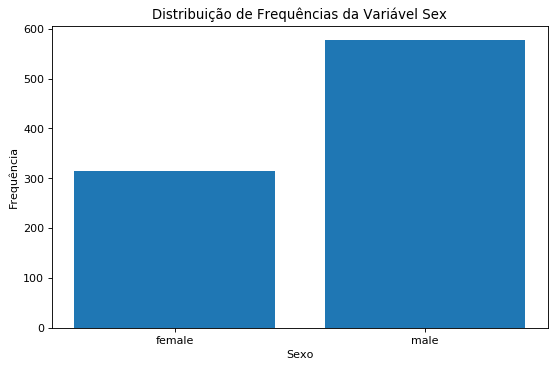

In [123]:
plt.figure(1, figsize=(8, 5), dpi=80)
plt.title("Distribuição de Frequências da Variável Sex")
plt.xlabel("Sexo")
plt.ylabel("Frequência")
plt.bar(sexo, frequencia)
plt.show()

Excelente! Conseguimos plotar o nosso primeiro gráfico de barras com a distribuição de frequências de uma variável. Vamos tentar obter agora a *distribuição de frequências relativa* da variável Sex, porém, visualizada em um gráfico de setores(pizza).

Podemos fazemos isso utilizando a função `plt.pie()`. Como já fizemos anteriormente, precisamos passar alguns parâmetros nesta função para plotarmos o gráfico. Aqui vamos precisar de pelo menos três parâmetros para termos as principais informações, a frequência relativa, o label de cada setor e o percentual que os valores representam na variável.

Estes parâmetros serão `x=frequencia` com a variável frequencia preenchendo o parâmetro, `labels=sexo` com a variável sexo preenchendo o parâmetro necessário para plotarmos os valores da variável no label de cada setor e o parâmetro `autopct='%2.2f%%'`com a string `'%2.2f%%'`, essa string se refere ao formato em que o valor com o percentual de cada setor tem na variável é apresentado, neste caso, estaremos usando um formato com valores flutuantes do tipo: 'aa.aa%'.

Não podemos esquecer de colocar o título e nomes dos eixos X e Y, além da função `plt.show()` para o modo display.

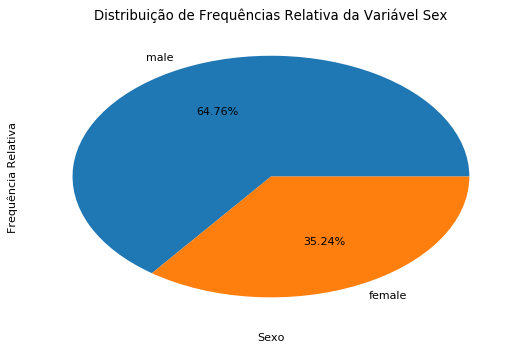

In [124]:
plt.figure(1, figsize=(8, 5), dpi=80)
plt.pie(x=frequencia, labels=sexo, autopct='%2.2f%%')
plt.title('Distribuição de Frequências Relativa da Variável Sex')
plt.xlabel('Sexo')
plt.ylabel('Frequência Relativa')
plt.show()

- **Gráficos para Variáveis Quantitativas: Histogramas**

In [36]:
numero_de_familiares = df['SibSp'].value_counts().index
frequencia = df['SibSp'].value_counts().values

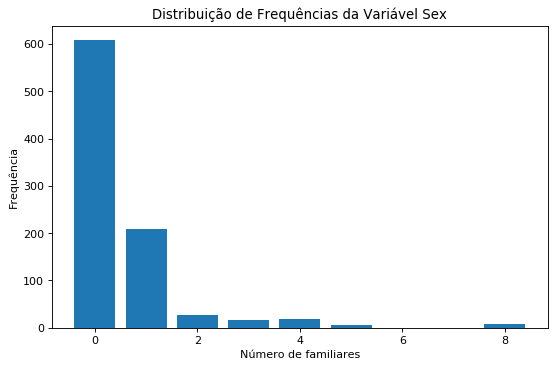

In [39]:
plt.figure(1, figsize=(8, 5), dpi=80)
plt.title("Distribuição de Frequências da Variável Sex")
plt.xlabel("Número de familiares")
plt.ylabel("Frequência")
plt.bar(numero_de_familiares, frequencia)
plt.show()

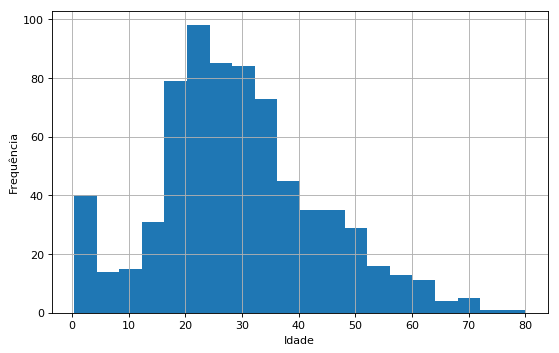

In [98]:
plt.figure(1, figsize=(8, 5), dpi=80)
plt.hist(df['Age'][df['Age'].notna()], bins='auto')
plt.grid(True)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

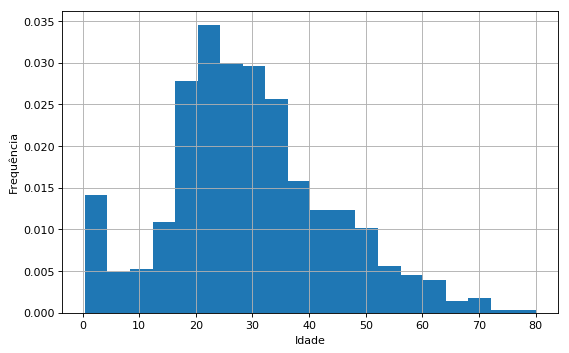

In [114]:
plt.figure(1, figsize=(8, 5), dpi=80)
plt.hist(df['Age'][df['Age'].notna()], bins='auto', density=True)
plt.grid(True)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

## Medidas Resumo

- **Medidas de Posição**
    - Moda
    - Mediana
    - Média

- **Medidas de Dispersão**
    - Variância
    - Desvio Padrão

In [97]:
(min(df['Age']), max(df['Age']))

(0.42, 80.0)

## Referências
- Estatística Básica - Bussab & Morettin

- https://www.kaggle.com/c/titanic

___

# ROTEIRO - POST ESTATÍSTICA BÁSICA

## Introdução
- Apresentar o objetivo do post
- Explicar o que é Estatística Descritiva
- Pacotes Usados
- Falar sobre as referências


## Resumo de Dados
#### Distribuição de frequências
- Distribuição de Frequências= .value_counts() pandas
- Frequência acumulada (pg 47)
- Uso de gráficos de barras e setores ("pizza") para resumir a distribuição de frequências para variáveis QUALITATIVAS
- Para variáveis QUANTITATIVAS, além das formas das qualitativas também temos o Histograma

## Medidas - Resumo
#### Medidas de Posição
- Moda
- Mediana
- Média

#### Medidas de Dispersão